---
title: Advanced Scientific computing
authors:
- name: Morgan Fouesneau
  orcid: 0000-0001-9256-5516
  affiliation: mpia
affiliations:
    - id: mpia
      institution: Max Planck Institute for Astronomy, Königstuhl 17, 69117 Heidelberg, Germany 
      ror: https://ror.org/01vhnrs90
      isni: 0000 0004 0491 677X
      department: Data Science Department
      address: Königstuhl 17
      city: Heidelberg
      country: Germany
      postal_code: 69117
date: 2022-11-24
---

## Package Requirements

For this workshop, we'll need a few packages. I create the list below.

In [1]:
%%file requirements.txt
matplotlib >= 3.4
numpy
snakemake
Cython
dask 
distributed
graphviz

Writing requirements.txt


## Installing requirements

We recommend creating a new environment for your project. This will allow you to track dependencies a lot easier. There are several different ways to do this (`virtualenv`, `pipenv`).

You can copy the list of packages above into a file (e.g. `requirements.txt`) to install them with `pip`.

```bash
python3 -m pip install -r requirements.txt
```

### Creating a virtual environment using `venv` (built-in Python 3.8+)

It’s the officially recommended way to create virtual environments since Python 3.5.

See [Documentation > The Python Tutorial > 12](https://docs.python.org/3/tutorial/venv.html). Virtual Environments and Packages for more information and a complete tutorial on `venv`.

The module used to create and manage virtual environments is called venv. venv will usually install the most recent version of Python that you have available. If you have multiple versions of Python on your system, you can select a specific Python version by running python3 or whichever version you want.

To create a virtual environment, decide upon a directory where you want to place it, and run the venv module as a script with the directory path:

```bash
python3 -m venv tutorial-env
source tutorial-env/bin/activate
```

> `python3 -m venv <dir>` creates a directory (and sub-directories) if it doesn’t exist, inside which you have a copy of the Python interpreter and various supporting files. The last line activates the environment.

In [2]:
!python3 -m venv --help

usage: venv [-h] [--system-site-packages] [--symlinks | --copies] [--clear]
            [--upgrade] [--without-pip] [--prompt PROMPT] [--upgrade-deps]
            ENV_DIR [ENV_DIR ...]

Creates virtual Python environments in one or more target directories.

positional arguments:
  ENV_DIR               A directory to create the environment in.

optional arguments:
  -h, --help            show this help message and exit
  --system-site-packages
                        Give the virtual environment access to the system
                        site-packages dir.
  --symlinks            Try to use symlinks rather than copies, when symlinks
                        are not the default for the platform.
  --copies              Try to use copies rather than symlinks, even when
                        symlinks are the default for the platform.
  --clear               Delete the contents of the environment directory if it
                        already exists, before environment creation.
  --up

> Using conda is also an option. 

In [3]:
!pip install -q pip --upgrade
!pip install -q -r requirements.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-client 7.3.5 requires tornado>=6.2, but you have tornado 6.1 which is incompatible.


# Outline of the workshop

* Researchers and scientific software developers write software daily. But only a few of us have gone through a specific training 

* Good programming practices make a HUGE difference!

* We can learn a lot from open source software and open science practices.


## 📝 Requirements for scientific programming 


* ⚙️ **Main requirement**: scientific code must be **error free**
* 🧑‍🔬 Scientist(s) time is the bottleneck, not computer time
    * code **optimized to explore many different models** (or statistical analyses) rather than a very fast single approach
* 💡 **Reproducibility** and **re-usability**, i.e., open science!
    * Every scientific result should be independently reproduced at least internally before publication
    * No need for somebody else to re-implement your algorithm
    * Increasing pressure for making the source code used in publications available online (especially for theoretical papers) 

In [4]:
%%file outline.yaml

Advanced scientific computing:
    code optimization:
        - Compiling code
        - vectorizing
        - changing approach
        - finding approximations
    scaling up & parallelization:
        What's the most outer loop?:
            - Is this the optimal parallel step?
            - Are other places better to scale
        backend solutions:
            - individual independent processes
            - multi-threads or multi-processes
            - OpenMP
            - MPI
        Limits of parallelization:
            Communication overhead
        Python solutions:
            - Dask
            - mpi4py
        HPC:
            Resources:
                - MPIA
                - MPCDF
            Scheduler:
                - SLURM
                - PBS
                - OpenGrid
                - Torque
                - ...      
        Cloud:
            - AWS
            - Google
            - MPCDF (experimental) 
    workflow design:
        What are the unit steps of your processing?:
            - Where is the bottleneck?
        Building failsafe checkpoints:
            - how to identify where to resume?
        Solutions:
            - individual step files
            - make
            - snakemake

Overwriting outline.yaml


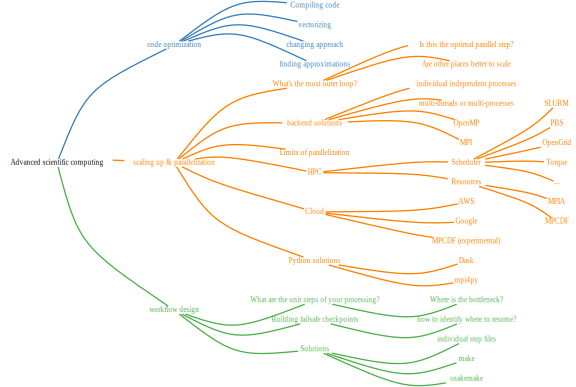

In [5]:
from dot_tools import DotMindMap, render_dot

dotscript = DotMindMap.from_yaml('outline.yaml')\
                      .generate(
    rankdir='LR', splines='curved', nodesep=0.5, remincross='true',
    node=dict(shape='plain', penwidth=4, fontsize=22),
    edge=dict(dir='none', penwidth=4)
)

render_dot(dotscript)

There are **three interconnected primary aspects** of advanced scientific computing:
1. Code optimization: the code should be error free and runs within contraints (memory limits, cpu limits, project deadline)
2. Scaling up & parallelizing: Overcoming some limitations by adding more CPUs/GPUs
3. Workflow design: complex project have successive tasks 

# Code optimization


> I will not get into the details of this part. This could be a lengthy workshop on its own.

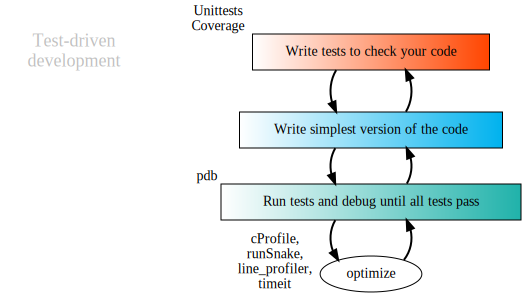

In [6]:
render_dot("""
digraph {    
nodesep=1.5
edge [splines=curved, penwidth=2;]
node [penwidth=1;]

"Test-driven\n development" [shape=none, fontcolor="gray", fontsize=18]

unittest [label="Write tests to check your code", shape=box, style=filled, fillcolor="white:orangered", xlabel="Unittests\nCoverage"]    
v0 [label="Write simplest version of the code", shape=box, style=filled, fillcolor="white:deepskyblue2"]
debug [label="Run tests and debug until all tests pass", shape=box, style=filled, fillcolor="white:lightseagreen", xlabel="pdb"]
optimize [xlabel="cProfile,\nrunSnake,\nline_profiler,\ntimeit"]

v0 -> unittest -> v0 
v0 -> debug -> v0
debug -> optimize -> debug
}
""")

## Unit tests in scientific computing

I will not cover unit testing in details but only briefly give some reminders.

### The basics

* What to test, and how?
* At first testing seems cumbersome
    * It’s obvious that this code works
    * The test scripts are longer than the code
    * The test code is partially a duplicate of the real code
* What does a good test looks like?
* What should I test?
* Anything specific to scientific code?


### A good test is divided in three parts:
1. Put your system in the right state for testing
    * Create objects, initialize parameters, define constants…
    * Define the expected result of the test
2. Execute the feature that you are testing
    * Typically one or two lines of code
3. Compare outcomes with the expected ones
    * Set of assertions regarding the new state of your system 

### Tips

* Test simple but general cases
    * Take a realistic scenario for your code; try to reduce it to a simple example 
* Test special cases and boundary conditions
    * Code often breaks because of empty lists, None, NaN, 0.0, duplicated elements, non-existing file, and what not...


### Numerical traps to avoid

* Use deterministic test cases when possible 
    * set a seed for any randomness
* For most numerical algorithm, tests cover only oversimplified situations; sometimes it is impossible 
* "fuzz testing", i.e. generated random input is mostly used to stress-test error handling, memory leaks, safety, etc

### Testing learning algorithm

* Learning algorithms can get stuck in local optima. The solution for general cases might not be known (e.g., unsupervised learning) 
* Turn your validation cases into tests (with a fixed random seed)
* Stability tests:
    * Start from final solution; verify that the algorithm stays there
    * Start from solution and add noise to the parameters; verify that the algorithm converges back 
* Generate mock data from the model with known parameters
    * E.g., linear regression: generate data as y = a*x + b + noise for random a, b, and x, and test

### Good practice: Test-driven development (TDD)

* *TDD = write your tests before your code*
    * Choose what is the next feature you’d like to implement
    * Write a test for that feature
    * Write the simplest code that will make the test pass

```python
def construct_stellar_binary_system(
    primary: Star, 
    other: Star, 
    separation_pc: float) -> BinaryStar:
    """ combine two stars into a binary system """
    pass

def test_construct_stellar_binary_system():
    """ testing binary creation"""
    age_myr = 100
    mass_msun = 1.2
    separation_pc = 5
    primary = Star(age=age_myr, mass=mass_msun)
    secondary = Star(age=age_myr, mass=mass_msun)
    binary = construct_stellar_binary_system(primary, secondary, separation_pc)
    assert(binary_center_of_mass = separation_pc / (1 + mass_msun/mass_msun)
```

* Pros
    * Forces you to think about the design of your code before writing it. How would you like to interact with it? Functionality oriented
    * The result is a code, with functions that can be tested individually. 
    * If the results are bad, you will always write tests to find a bug. Would you if it works fine?

* Cons
    * The tests may be difficult to write, especially beyond the level of unit testing.
    * In the beginning, it may slow down development, but in the long run, it actually speeds up development.
    * The whole team needs to buy into Unit testing for it to work well.
    * can be tiresome, but it pays off big time in the end.
    * Early stage refactoring requires refactoring test classes as well.


> Just remember, code quality is not just testing: "Trying to improve the quality of software by doing more testing
is like trying to lose weight by weighing yourself more often" (Steve McConnell, Code Complete) 

## Debugging

* The best way to debug is to avoid bugs; In the TDD approach, you anticipate the bugs.

* Your test cases should already exclude a big portion of the possible causes

* **Debugging**: you can stop the execution of your application at the bug, look at the state of the variables, and execute the code step by step

* Avoid littering your code with print statements

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


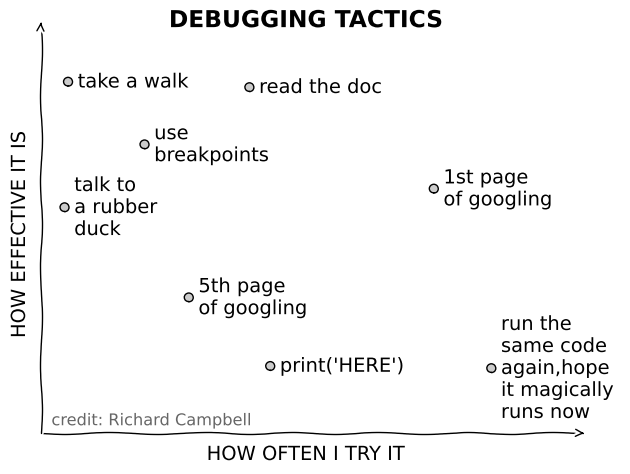

In [7]:
# https://twitter.com/richcampbell/status/1332352909451911170

data = [
    [0.4759661543260535, 0.12666090643583958, "print('HERE')"],
    [0.04923548622981727, 0.5457176990923284, "talk to \na rubber \nduck"],
    [0.05651578600041251, 0.8771591620517387, "take a walk"],
    [0.21519285466283264, 0.7117496092048837, "use \nbreakpoints"],
    [0.43276244622461313, 0.8627585849845054, "read the doc"],
    [0.8153700616580029, 0.5948858808650268, "1st page \nof googling"],
    [0.934701455981579, 0.12094548707232779, "run the \nsame code \nagain,hope \nit magically \nruns now"],
    [0.30699250495137204, 0.30778449079602965, "5th page \nof googling"],
]
%matplotlib inline
import pylab as plt
from mpl_toolkits.axisartist.axislines import AxesZero

with plt.xkcd():
    plt.figure()
    plt.subplot(axes_class=AxesZero)
    plt.xlabel("How often I try it".upper())
    plt.ylabel("How effective it is".upper())
    for x, y, t in data:
        plt.plot(x, y, 'o', mec='k', mfc='0.8')
        plt.text(x + 0.02, y, t, color='k', ha='left', va='center')
    plt.text(0.02, 0.02, "credit: Richard Campbell", ha='left',
             color='0.4', transform=plt.gca().transAxes,
             fontsize='small')
    ax =  plt.gca()
    for direction in ["bottom", "left"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("->")
    for direction in ["top", "right"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0, 1.1)
    plt.ylim(-0.05, 1)
    plt.title('Debugging Tactics'.upper(), fontsize='large', fontweight='bold')
plt.tight_layout()

### `pdb`, the Python debugger

[Official documentation](https://docs.python.org/3/library/pdb.html)

* Command-line based debugger
    * pdb opens an interactive shell, in which one can interact with the code

* examine and change value of variables
    * execute code line by line
    * set up breakpoints
    * examine calls stack

* Enter debugger at the start of a file:
```bash
python –m pdb script.py
```

* Enter at a specific point in the code (alternative to print):
```python
# some code here
# the debugger starts here
import pdb;		pdb.set_trace()
# rest of the code
```

* Entering the debugger from ipython
    * `%pdb` – preventive
    * `%debug` – post-mortem

In [8]:
from IPython.core import debugger
debug = debugger.Pdb().set_trace


def example_function():
    import pdb; pdb.set_trace()
    filename = "tmp.py"
    print(f'path = {filename}')
    debug()

def example_function2():
    example_function()
    return 1

In [9]:
example_function2()

> /tmp/ipykernel_86/3356530899.py(7)example_function()
      5 def example_function():
      6     import pdb; pdb.set_trace()
----> 7     filename = "tmp.py"
      8     print(f'path = {filename}')
      9     debug()



`%xmode Verbose`

In [10]:
%xmode Verbose

Exception reporting mode: Verbose


## Optimization & Profiling



* Python or `<insert code name here >` is slower than C, but not prohibitively so. (For python progress is happening right now!)
* In scientific applications, the difference is even more complicated as you often call C/Fortan libraries without knowing it (e.g., numpy, scipy, ...).
* "It is better to have a working code than being very fast to spill garbage" - MF

**So never rush into writing optimizations**



### What is the strategy to optimize codes?

It is important to first say that optimizing means updating the code, not changing where it runs.

* Usually, a small percentage of your code takes up most of the time

1. Identify time-consuming parts of the code (use a profiler)
2. Only optimize those parts of the code
3. Keep running the tests to make sure that code is not broken

* Finally, stop optimizing as soon as possible 

### Preferred optimization order

Below, I give what in my opinion the priority of optimization strategies.

1. Vectorize code (e.g. using numpy)
2. Use a specific optimization toolkits (e.g., numexpr, numba, jax)
3. Check if compiler change could make sense (e.g., Intel’s MKL optimized libraries)
4. Use Cython to create compiled functions
5. Change approach
6. approximate calculations

(Again: we do not touch on parallelization of change of hardware here)

### Python examples

#### Using timeit

* Precise timing of a function/expression
* Test different versions of a small amount of code, often used in interactive Python shell
* In ipython, you can use the `%timeit` magic command 

In [11]:
def f(x):
    return x**2
def g(x):
    return x**4
def h(x):
    return x**8

import timeit
time_in_sec = timeit.timeit('[func(42) for func in (f,g,h)]', globals=globals(), number=1000) / 1000
print(f'{time_in_sec * 1e6: 0.3f} µs loop per 1000 run')

 2.200 µs loop per 1000 run


In [12]:
%timeit [func(42) for func in (f,g,h)]

1.32 µs ± 46.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Sadly, timeit does not have convenient calls for multiple tests at once.

In [13]:
import timeit

subStrings=['Sun', 'Mon', 'Tue', 
            'Wed', 'Thu', 'Fri', 
            'Sat']

def simpleString(subStrings):
    finalString = ''
    for part in subStrings:
        finalString += part
    return finalString

def formatString(subStrings):
    finalString = "%s%s%s%s%s%s%s" % (subStrings[0], subStrings[1],
    subStrings[2], subStrings[3],
    subStrings[4], subStrings[5],
    subStrings[6])
    return finalString
 
def joinString(subStrings):
    return ''.join(subStrings)

print('joinString() Time   : ' + str(timeit.timeit('joinString(subStrings)', setup='from __main__ import joinString, subStrings')))
print('formatString() Time : '+ str(timeit.timeit('formatString(subStrings)', setup='from __main__ import formatString, subStrings')))
print('simpleString() Time : ' + str(timeit.timeit('simpleString(subStrings)', setup='from __main__ import simpleString, subStrings')))

joinString() Time   : 0.19658333300003505
formatString() Time : 0.5273888070000794
simpleString() Time : 0.5306312499997148


The above example demonstrates that the join method is a bit more efficient than the others.

See more examples in the `timeit` [documentation](https://docs.python.org/3/library/timeit.html)

### Profiling code, cProfile

It’s since Python 2.5 that cProfile is a part of the Python package. It brings a nice set of profiling features to isolate bottlenecks in the code. You can tie it in many ways with your code. Like, wrap a function inside its run method to measure the performance. Or, run the whole script from the command line.


* standard Python module to profile an entire application (profile is an old, slow profiling module)
* Running the profiler from command line:
```python -m cProfile myscript.py```
 * Options
 ```
 -o output_file
 -s sort_mode (calls, cumulative,name, …)
 ```

A convenient way of visualizing results: [`RunSnakeRun`](https://github.com/mcfletch/runsnakerun)

In [14]:
import cProfile
cProfile.run('10*10')

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




> Tip: you can make your life easier sometimes
> Use `decorators`, `context managers`, ...
> without much details, an example below

In [15]:
import cProfile

def cProfile_decorator(fun):
    """ convenient decorator for cProfile """
    def wrapped(*args, **kwargs):
        with cProfile.Profile() as pr:
            result = pr.runcall(fun, *args, **kwargs)
        # also order by cumulative time
        # https://docs.python.org/3/library/profile.html#pstats.Stats
        print("Profile of ", fun.__name__)
        pr.print_stats('cumulative')
        return result
    return wrapped

turn this code
```python
prof = cProfile.Profile()
retval = prof.runcall(myfunction, a, b, c, alpha=1)
prof.print_stats()
```

into this code
```python
cProfile_decorator(myfunction)(na, b, c, alpha=1)
```

Example usage

In [16]:
Zipcodes = ['121212','232323','434334']
newZipcodes = ['  131313 ',' 242424   ',' 212121 ',
               '  323232','342312  ',' 565656 ']

@cProfile_decorator
def updateZips(newZipcodes, Zipcodes):
    for zipcode in newZipcodes:
        Zipcodes.append(zipcode.strip())


updateZips(newZipcodes, Zipcodes)

Profile of  updateZips
         16 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 cProfile.py:106(runcall)
        1    0.000    0.000    0.000    0.000 2694281501.py:5(updateZips)
        6    0.000    0.000    0.000    0.000 {method 'strip' of 'str' objects}
        6    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'enable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




**How to interpret cProfile results?**

1. `<ncalls>`: It is the number of calls made.
2. `<tottime>`: It is the aggregate time spent in the given function.
3. `<percall>`: Represents the quotient of `<tottime>` divided by `<ncalls>`.
4. `<cumtime>`: The cumulative time in executing functions and its subfunctions.
5. `<percall>`: Signifies the quotient of `<cumtime>` divided by primitive calls.
6. `<filename_lineno(function)>`: Point of action in a program. It could be a line no. or a function at some place in a file.

Now, you have all elements of profiling report under check. So you can go on hunting the possible sections of your program creating bottlenecks in code.

First of all, start checking the `<tottime>` and `<cumtime>` which matters the most. The `<ncalls>` could also be relevant at times. For rest of the items, you need to practice it yourself.

### Optimizing loops

Most programming language stress upon the need to optimize loops. 

In Python, you’ll see a couple of building blocks that support looping. Out of these few, the use of "for" loop is prevalent. While you might be fond of using loops but they come at a cost.
Python loops are slow for instance. Although not as slow as other languages, the Python engine spends substantial efforts in interpreting the for loop construction. Hence, it’s always preferable to replace them with built-in constructs, such as maps, or generators.

Next, the level of code optimization also depends on your knowledge of Python built-in features. 

In [17]:
import timeit
import itertools

Zipcodes = ['121212','232323','434334']
newZipcodes = ['  131313 ',' 242424   ',' 212121 ',
               '  323232','342312  ',' 565656 ']

def updateZips(newZipcodes, Zipcodes):
    for zipcode in newZipcodes:
        Zipcodes.append(zipcode.strip())

def updateZipsWithMap(newZipcodes, Zipcodes):
    Zipcodes += map(str.strip, newZipcodes)

def updateZipsWithListCom(newZipcodes, Zipcodes):
    Zipcodes += [iter.strip() for iter in newZipcodes]

def updateZipsWithGenExp(newZipcodes, Zipcodes):
    return itertools.chain(Zipcodes, (iter.strip() for iter in newZipcodes))


print('updateZips() Time            : ' + str(timeit.timeit('updateZips(newZipcodes, Zipcodes)', 
      setup='from __main__ import updateZips, newZipcodes, Zipcodes')))

Zipcodes = ['121212','232323','434334']
print('updateZipsWithMap() Time     : ' + str(timeit.timeit('updateZipsWithMap(newZipcodes, Zipcodes)', 
      setup='from __main__ import updateZipsWithMap, newZipcodes, Zipcodes')))

Zipcodes = ['121212','232323','434334']
print('updateZipsWithListCom() Time : ' + str(timeit.timeit('updateZipsWithListCom(newZipcodes, Zipcodes)', 
      setup='from __main__ import updateZipsWithListCom, newZipcodes, Zipcodes')))

Zipcodes = ['121212','232323','434334']
print('updateZipsWithGenExp() Time  : ' + str(timeit.timeit('updateZipsWithGenExp(newZipcodes, Zipcodes)', 
      setup='from __main__ import updateZipsWithGenExp, newZipcodes, Zipcodes')))

updateZips() Time            : 1.136983916999725
updateZipsWithMap() Time     : 0.8573283430000629
updateZipsWithListCom() Time : 1.054376922999836
updateZipsWithGenExp() Time  : 0.6104460599999584


The above examples are showing that using built-in generators could speed up your code instead of using some for-loops

You can also use external libraries (e.g. numpy)

In [18]:
def raw_sum(N):
    total = 0
    for i in range(N):
        total = i + total
    return total

def builtin_sum(N):
    return sum(range(N))


print('raw_sum() Time   : ' + str(timeit.timeit('raw_sum(1_000)', 
      setup='from __main__ import raw_sum, builtin_sum')))
print('builtin_sum() Time   : ' + str(timeit.timeit('builtin_sum(1_000)', 
      setup='from __main__ import raw_sum, builtin_sum')))
print('np.sum() Time   : ' + str(timeit.timeit('np.sum(np.arange(1_000))', 
      setup='import numpy as np')))

raw_sum() Time   : 51.318027649000214
builtin_sum() Time   : 22.330166953000116
np.sum() Time   : 5.476038152000001


In [19]:
def count_transitions(x) -> int:
    count = 0
    for i, j in zip(x[:-1], x[1:]):
        if j and not i:
            count += 1
    return count

import numpy as np
np.random.seed(42)
x = np.random.choice([False, True], size=100_000)

setup = 'from __main__ import count_transitions, x; import numpy as np'
num = 1000
t1 = timeit.timeit('count_transitions(x)', setup=setup, number=num)
t2 = timeit.timeit('np.count_nonzero(x[:-1] < x[1:])', setup=setup, number=num)
print("count_transitions() Time   :", t1)
print("np.count_nonzero() Time   :", t2)
print(f"speed up: {t1/t2:g}x")

count_transitions() Time   : 7.047155953999663
np.count_nonzero() Time   : 0.13375400499990064
speed up: 52.6874x


Check out also our FAQ: e.g. [NumbaFun](https://github.com/mpi-astronomy/FAQ/blob/main/coding/NumbaFun.ipynb)

### Python vs. Numpy vs. Cython

In [20]:
import time
import numpy as np
import random as rn

def timeit(func):
    """ Timing decorator """
    execution_time = [None]
    def wrapper(*args, **kwargs):
        before = time.time()
        result = func(*args, **kwargs)
        after = time.time()
        print("Timing ", func.__name__, "  : ", after - before, " seconds")
        execution_time[0] = after-before
        return result
    setattr(wrapper, "last_execution_time", execution_time)
    setattr(wrapper, "__name__", func.__name__)
    return wrapper

@timeit
def python_dot(u, v, res):
    m, n = u.shape
    n, p = v.shape
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

@timeit
def numpy_dot(arr1, arr2):
    return np.array(arr1).dot(arr2)

In [21]:
u = np.random.random((100,200))
v = np.random.random((200,100))

res = np.zeros((u.shape[0], v.shape[1]))

_ = python_dot(u, v, res)
_ = numpy_dot(u, v)
print("speed up: ", python_dot.last_execution_time[0] / numpy_dot.last_execution_time[0])

Timing  python_dot   :  1.334284782409668  seconds
Timing  numpy_dot   :  0.0006842613220214844  seconds
speed up:  1949.963763066202


NumPy is approximately 2000 times faster than naive Python implementation of dot product.

Although, to be fair, NumPy uses an optimized BLAS library when possible, i.e., it calls fortran routines to achieve such performance.

In [22]:
# We'll use Jupyter magic function here.
%load_ext Cython

Below the `-a` option indicates annotate, which let us look at the C code generated by cython. Note that annotations may also slow down the execution as it generates some additional code sometimes.

In [23]:
%%cython -a

cimport numpy as np

def c_dot_raw(u, v, res):
    """ Direct copy-paste of python code """
    m, n = u.shape
    n, p = v.shape
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


def c_dot(double[:,:] u, double[:, :] v, double[:, :] res):
    """ python code with typed variables """
    cdef int i, j, k
    cdef int m, n, p

    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In file included from /shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1948,
                 from /shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_240415eda3b4050c9a7155b578778a59.c:769:
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it with " \
  ^~~~~~~


In [24]:
c_dot_raw = timeit(c_dot_raw)
c_dot = timeit(c_dot)
c_dot_raw(u, v, res)
c_dot(u, v, res);
print("speed up: ", c_dot_raw.last_execution_time[0] / c_dot.last_execution_time[0])

Timing  c_dot_raw   :  1.178865671157837  seconds
Timing  c_dot   :  0.004058837890625  seconds
speed up:  290.44413768796994


In [25]:
python_dot(u, v, res)
numpy_dot(u, v)
c_dot_raw(u, v, res)
c_dot(u, v, res);
print("speed up: ", python_dot.last_execution_time[0] / numpy_dot.last_execution_time[0])
print("speed up: ", c_dot_raw.last_execution_time[0] / c_dot.last_execution_time[0])
print("speed up: ", numpy_dot.last_execution_time[0] / c_dot.last_execution_time[0])

Timing  python_dot   :  1.360779047012329  seconds
Timing  numpy_dot   :  0.0036323070526123047  seconds
Timing  c_dot_raw   :  1.3408169746398926  seconds
Timing  c_dot   :  0.0027773380279541016  seconds
speed up:  374.6321627830653
speed up:  482.77053824362605
speed up:  1.307837582625118


The `c_dot_raw` function is as slow as the pure python implementation, but as soon as we help the compiler with typing the variables, `c_dot` becomes 400 times faster, and still 10 times faster than numpy.

> Why is that faster than numpy?? (think overhead and checks)

In [26]:
%%cython

import cython

@cython.boundscheck(False)
@cython.wraparound(False)
def c_dot_nogil(double[:,:] u, double[:, :] v, double[:, :] res):
    cdef int i, j, k
    cdef int m, n, p

    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]

    with cython.nogil:
        for i in range(m):
            for j in range(p):
                res[i,j] = 0
                for k in range(n):
                    res[i,j] += u[i,k] * v[k,j]

In [27]:
c_dot_nogil = timeit(c_dot_nogil)

In [28]:
python_dot(u, v, res)
numpy_dot(u, v)
c_dot_raw(u, v, res)
c_dot(u, v, res)
c_dot_nogil(u, v, res);
print("speed up: ", c_dot.last_execution_time[0] / c_dot_nogil.last_execution_time[0])

Timing  python_dot   :  1.3100073337554932  seconds
Timing  numpy_dot   :  0.0026481151580810547  seconds
Timing  c_dot_raw   :  1.4399614334106445  seconds
Timing  c_dot   :  0.002748250961303711  seconds
Timing  c_dot_nogil   :  0.0025892257690429688  seconds
speed up:  1.0614180478821362


Probably unintuitively, removing the GIL does not give us a speed up. But note that we did not set any parallelization rule, so python does not further optimize the code.

In [29]:
%%cython --compile-args=-fopenmp --link-args=-fopenmp --force

import cython
from cython.parallel import parallel, prange


@cython.boundscheck(False)
@cython.wraparound(False)
def c_dot_nogil_parallel(double[:,:] u, double[:, :] v, double[:, :] res):
    cdef int i, j, k
    cdef int m, n, p

    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]

    with cython.nogil, parallel():
        for i in prange(m):
            for j in prange(p):
                res[i,j] = 0
                for k in range(n):
                    res[i,j] += u[i,k] * v[k,j]

In [30]:
c_dot_nogil_parallel = timeit(c_dot_nogil_parallel)

In [31]:
python_dot(u, v, res)
numpy_dot(u, v)
c_dot_raw(u, v, res)
c_dot(u, v, res)
c_dot_nogil(u, v, res);
c_dot_nogil_parallel(u, v, res);
print("speed up: ", c_dot.last_execution_time[0] / c_dot_nogil_parallel.last_execution_time[0])

Timing  python_dot   :  1.3250672817230225  seconds
Timing  numpy_dot   :  0.008971214294433594  seconds
Timing  c_dot_raw   :  1.32857084274292  seconds
Timing  c_dot   :  0.0027518272399902344  seconds
Timing  c_dot_nogil   :  0.0025892257690429688  seconds
Timing  c_dot_nogil_parallel   :  0.0009729862213134766  seconds
speed up:  2.8282283753981865


The last example is the perfect queue to the next topic: parallelization!

# Scaling up & parallelization

References:
* [Introduction to High-Performance Computing](https://carpentries-incubator.github.io/hpc-intro/aio/index.html)
* [Pratical Datascience](https://www.practicaldatascience.org/html/parallelism.html)

Research problems these days can outgrow the capabilities of the desktop/laptop computer.

* If you want to cross-validate a model, you need to run multiple times a training/testing workflow (e.g. K-fold or leave-one-out) -- each could take hours. 
Since each of the runs is independent of all others, and given enough computers, it's theoretically possible to run them all at once (in **parallel**).

* When the dataset does not fit into memory. Take for instance Gaia data, it could easily fill your memory before any manipulation. The calculations required might be impossible to parallelize, but a computer with __more memory__ would be required. Imagine analyzing the Gaia spectra for 1.2 Bn sources, it would be foolish to load it all in memory, but each source analysis can be independent from each other. This is call a __massively parallel__ problem.

* More complex calultations moving away from "toy" examples. For instance going from 2D-LTE stellar atmospheres to 3D-NLTE simulations. Or large N-Body simulations (e.g. TNG). In these research problems, the calculations in each sub-region of the simulation are largely independent of other regions of the simulation (apart from these edges). It's possible to run each
region's calculations simultaneously (in __parallel__), and communicate selected results to adjacent regions as needed. __both the amount of data and the amount of calculations increases greatly__, and it's theoretically possible to distribute the calculations across multiple computers communicating over a shared network.

In all these cases, having bigger computers would help.


## What is Parallelism?

Parallelism is the process of:

1. taking a single problem,
2. breaking it into lots of smaller problems,
3. assigning those smaller problems to a number of processing cores that are able to operate independently, and
4. recombining the results.

> Parallelism is not easy, and so not only does it take substantial developer time (the time it takes you to implement it), but there are computer-time costs to breaking down problems, distributing them, and recombining them, often limiting the returns you will see to parallelism.

## Limitations of parallelisation: Amdahl's law

Amdahl’s Law describes the theoretical limits of parallelization. If $P$ is the proportion of your algorithm that can be parallelized, and $N$ is the number of cores available, the fundamental limit to the speed-up you can get from parallelization is given by:
$$\begin{aligned}\textrm{total speed up} &= \frac{T_1}{T_N} \\ &= \frac{1}{\frac{P}{N} + (1 - P)} \\&\leq \frac{1}{1-P}\end{aligned}$$

This analysis neglects other potential bottlenecks such as memory bandwidth and I/O bandwidth. If these resources do not scale with the number of processors, then merely adding processors provides even lower returns.


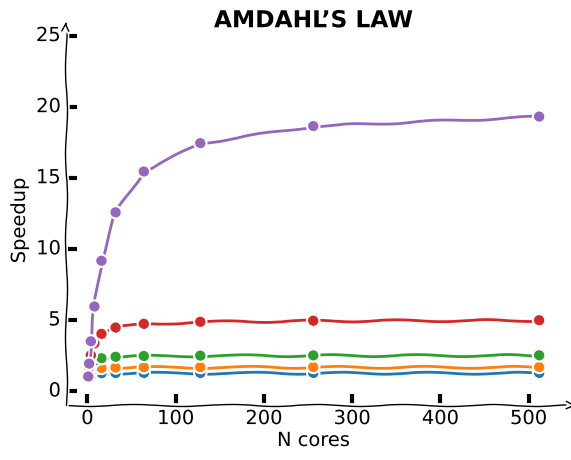

In [32]:
%matplotlib inline
import pylab as plt
import numpy as np
from mpl_toolkits.axisartist.axislines import AxesZero

P = np.array([0.2, 0.4, 0.6, 0.8, 0.95])
N = np.array([2 ** k for k in range(10)])

S_N = 1 / ((1 - P[:, None]) + P[:, None] / N[None, :])

with plt.xkcd():
    plt.figure()
    plt.subplot(axes_class=AxesZero)

    plt.plot(N, S_N.T , 'o-')

    ax =  plt.gca()
    for direction in ["bottom", "left"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("->")
    for direction in ["top", "right"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_visible(False)
    #plt.xticks([])
    #plt.yticks([])
    plt.title("Amdahl’s Law".upper(), fontsize='large', fontweight='bold')
    plt.ylim(-1, 25)
    plt.xlabel('N cores')
    plt.ylabel('Speedup')

## Strategies: what to parallelize?

It is important to identify the bottleneck of your analysis, but also which steps can run independently from one-another.


**A general rule of thumb**: you'll achieve a larger parallel fraction if you distributed the most outer loops.

## Backends: Multi-Threading vs. Multi-Processing

There are fundamentally only 2 approaches to parallelize codes.

* **Multi-Threading**: running tasks on a set of cores sharing information by accessing the same memory (multi-core computations)
* **Multi-Processing**: running tasks across multiple processings which have to communicate data to share information. E.g. multiple physical units CPUs or computers.

> Confusingly, though, the way hyperthreading manifests is by telling your operating system that you have two cores for every physical core on your computer. 

In [33]:
import os
import psutil

print("Number of logical CPUs: ", os.cpu_count())
print("Number of physical CPUs: ", psutil.cpu_count(logical=False))

Number of logical CPUs:  8
Number of physical CPUs:  4


So, how should you think about this?

* In most contexts (if you’re not shoping for hardware), expect the terms "cores" and "processors" to both be used to refer to independent processing cores.

* Don’t worry about whether they’re distributed across two different physical chips or not – all that matters is the number of cores on your computer.

* On most computers, expect the operating system to think that you have twice as many cores (sometimes referred to as "logical cores"") as you have actual "physical cores", but expect your performance to reflect the number of physical cores you actually have.

### A first example with joblib

First, let's write a little weather temperature simulation. We assume that from day to day we cannot have arbitrarily large variations, but that the temperature at $t+1$ is randomly distribution around the temperature at $t$ (with some spread) -- if it’s hot today, it’s likely to be hot tomorrow.

In [34]:
import numpy as np
import numpy.random as npr

npr.seed(42)

def weather_at_t_plus_one(temp_at_t, std_dev):
    return npr.normal((20 + temp_at_t)/2, std_dev)

def simulate_weather(starting_temp, weather_std_dev, steps):
    weather_at_time_t = starting_temp

    for _ in range(steps):
        weather_at_time_t = weather_at_t_plus_one(weather_at_time_t, 
                                                  weather_std_dev)

    return weather_at_time_t

In [35]:
%%time
results = []
for run in range(1_000_000):
    results.append(simulate_weather(75, 5, 10))

CPU times: user 10.9 s, sys: 31.7 ms, total: 10.9 s
Wall time: 11 s


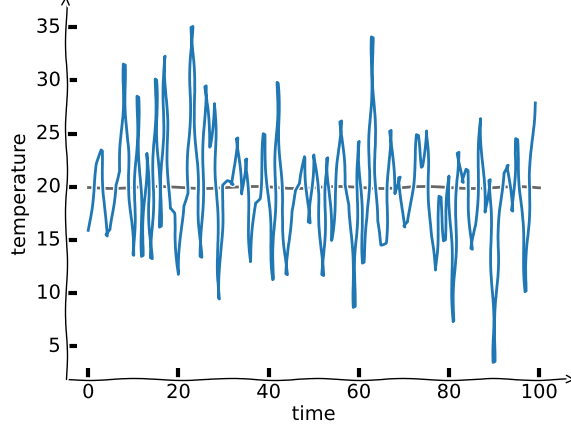

In [36]:
%matplotlib inline
import pylab as plt
from mpl_toolkits.axisartist.axislines import AxesZero

Npoints = 100

with plt.xkcd():
    plt.figure()
    plt.subplot(axes_class=AxesZero)

    plt.plot([0, Npoints], [20, 20], color='0.4')
    plt.plot(np.arange(Npoints), results[-Npoints:])

    ax =  plt.gca()
    for direction in ["bottom", "left"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("->")
    for direction in ["top", "right"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_visible(False)
    #plt.xticks([])
    #plt.yticks([])

    plt.xlabel('time')
    plt.ylabel('temperature')

So let’s try parallelizing these simulations using `joblib`.

In [37]:
from joblib import Parallel, delayed #Import the relevant tools

# Joblib wants a function that only takes a single argument.
# Since we're not changing our parameters with each run, we just create a
# "little barrier function" that takes one argument.

def run_simulation(i):
    return simulate_weather(20, 5, 10)

In [38]:
%%timeit 
results = Parallel(n_jobs=10)(delayed(run_simulation)(i) for i in range(1_000_000))
np.mean(results)

23.5 s ± 687 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


So this shows there's a lot of fixed costs to getting this independent processes running and passing things back and forth, as a result of which the benefits of parallelism are almost always sub-linear (i.e. using 10 processors instead of 1 will result in <10x speedups).

## Multi-processing versus Multi-threading

Multiprocessing is nice because (a) you can use it on big server clusters where different processes may be running on different computers, and (b) it’s quite safe. As a result, most parallelism you’re like to encounter will be multi-processing.

In multi-threading, all the code being run (each sequence execution of which is called a “thread”) exists within a single process, meaning that all the different threads have access to the same objects in memory. This massively reduces duplication because you don’t have to copy your code and data and pass it around – all the threads can see the same parts of memory.

But multi-threading has three major shortcomings:

* It is very easy to run into very subtle but profound problems that lead to corruption (the biggest of which is something called [Race Conditions](https://youtu.be/7ENFeb-J75k)).

* Multi-threading can only distribute a job over the cores on a single computer, meaning it can’t be used to distribute a job over hundreds of cores in a large computing cluster.

* You generally can’t use multi-thread parallelism in Python because of a fundamental component of its architecture (the [GIL](https://realpython.com/python-gil)).

## GPU Parallelism

GPU parallelism is the practice of using Graphical Processing Units (GPUs) to do extremely parallel computing.

GPUs are basically designed for the sole purpose of processing graphics, i.e, lots of matrix algebra. And so scientists initially hacked their way to using their capacities, and we now even have double precision GPU units. 

GPU processors aren’t "general purpose", they only do tensor operations, and as a result they do it super fast. They are massively parallel: while your CPU (your Intel chip) may have ~4-8 cores, a modern GPU has either hundreds or thousands of cores.

But because GPUs are basically computers onto themselves, to use them you have to write special code to both manage all those cores and also manage the movement of data from your regular computer to the GPU. However, you probably will never write your own GPU parallel algorithm, but if you end up in an area that uses them a lot (i.e. training neural networks), the libraries you use will (e.g. Tensorflow, pyTorch, Jax, Numpyro, ...).

### Illustration of GPU parallel processing
[![NVIDIA: Adam and Jamie explain parallel processing on GPU's](https://img.youtube.com/vi/ZrJeYFxpUyQ/0.jpg)](https://www.youtube.com/watch?v=ZrJeYFxpUyQ&t=477 "NVIDIA: Adam and Jamie explain parallel processing on GPU's")

[![NVIDIA: Adam and Jamie explain parallel processing on GPU's](https://img.youtube.com/vi/ZrJeYFxpUyQ/0.jpg)](https://fb.watch/fMoXwjaEtc/)

# Parallelism and Distributed Computing

We’ll discuss some packages that are designed to make parallelism as easy as possible in situations where you really need parallelism. In particular, we’ll focus on tools for distributed computer: situations where you don’t just want to parallelize across the cores in your computer, but across many computers (e.g. in the cloud). But when we get to these tools – like `pyspark` and `dask` – try to keep in mind the lessons we’ve learned here, because everything you’ve learned here applies to those packages as well!


Most of the times when you are using distributed computing, you will be using a scheduler and a pool of workers. Tasks are submitted to the scheduler and the latter takes care of scattering to the workers and gathering the results.

Below an illustration from [Dask.org](https://tutorial.dask.org/00_overview.html).

![Dask cluster](https://tutorial.dask.org/_images/distributed-overview.png)

### Example of calulating $\pi$

Let's try running a Python code that makes use of parallel computing.

The following implements a classic example in computational science: estimating the numerical value of pi via Monte Carlo sampling. Imagine you're throwing darts, and you're not very accurate. You are trying to hit a spot somewhere within a circular target, but you can't manage to do much better than throw it somewhere within the square that bounds the target, hitting any point within the square with equal probability. The red dots are those darts that manage to hit the circle, and the blue dots are those darts that don't.

(-1.0, 1.0)

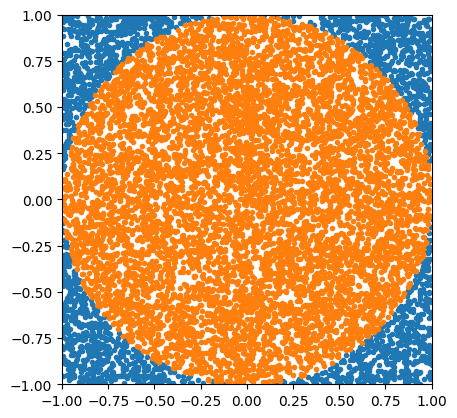

In [39]:
%matplotlib inline
import pylab as plt

x, y = np.random.uniform(-1, 1, (2, 10_000))
ind = x ** 2 + y ** 2 <= 1
plt.subplot(111, aspect='equal')
plt.plot(x[~ind], y[~ind], '.', rasterized=True)
plt.plot(x[ind], y[ind], '.', rasterized=True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

### With python multiprocessing

In [40]:
import random
import numpy as np
import multiprocessing
from multiprocessing import Pool

def monte_carlo_pi_part(n: int) -> int:
    """ Calculate the number np points out of n attempts in the unit circle """
    count = 0
    for i in range(n):
        x=random.random()
        y=random.random()
        
        # if it is within the unit circle
        if x*x + y*y <= 1:
            count = count + 1
        
    return count


ncpus = multiprocessing.cpu_count()
print('You have {0:1d} CPUs'.format(ncpus))

# Nummber of points to use for the Pi estimation
n = 10_000_000

# iterable with a list of points to generate in each worker
# each worker process gets n/np number of points to calculate Pi from
part_count = [n // ncpus] * ncpus

#Create the worker pool
# http://docs.python.org/library/multiprocessing.html#module-multiprocessing.pool
pool = Pool(processes=ncpus)   

# parallel map
count = pool.map(monte_carlo_pi_part, part_count)

estimate = sum(count) / (n * 1.0) * 4
error = np.pi - estimate

print(f"Estimated value of Pi:: {estimate:g}")
print(f"               error :: {error:e}")

You have 8 CPUs
Estimated value of Pi:: 3.14253
               error :: -9.373464e-04


### with Dask

In [41]:
from dask.distributed import Client
import dask
client = Client(threads_per_worker=4, n_workers=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 4,Total memory: 4.66 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38745,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 4.66 GiB
Comm: tcp://127.0.0.1:38147,Total threads: 4
Dashboard: http://127.0.0.1:34347/status,Memory: 4.66 GiB
Nanny: tcp://127.0.0.1:45351,


#### Direct adaptation: map/reduce

In [42]:
import dask.array as da

# Nummber of points to use for the Pi estimation
n = 100_000_000

# iterable with a list of points to generate in each worker
# each worker process gets n/np number of points to calculate Pi from
part_count = [n // ncpus] * ncpus

count = client.map(monte_carlo_pi_part, part_count)
count = client.gather(count)
estimate = sum(count) / (n * 1.0) * 4
error = np.pi - estimate
print(f"Estimated value of Pi:: {estimate:g}")
print(f"               error :: {error:e}")

Estimated value of Pi:: 3.14069
               error :: 8.979336e-04


#### Dask magic: Delayed and graph calculations

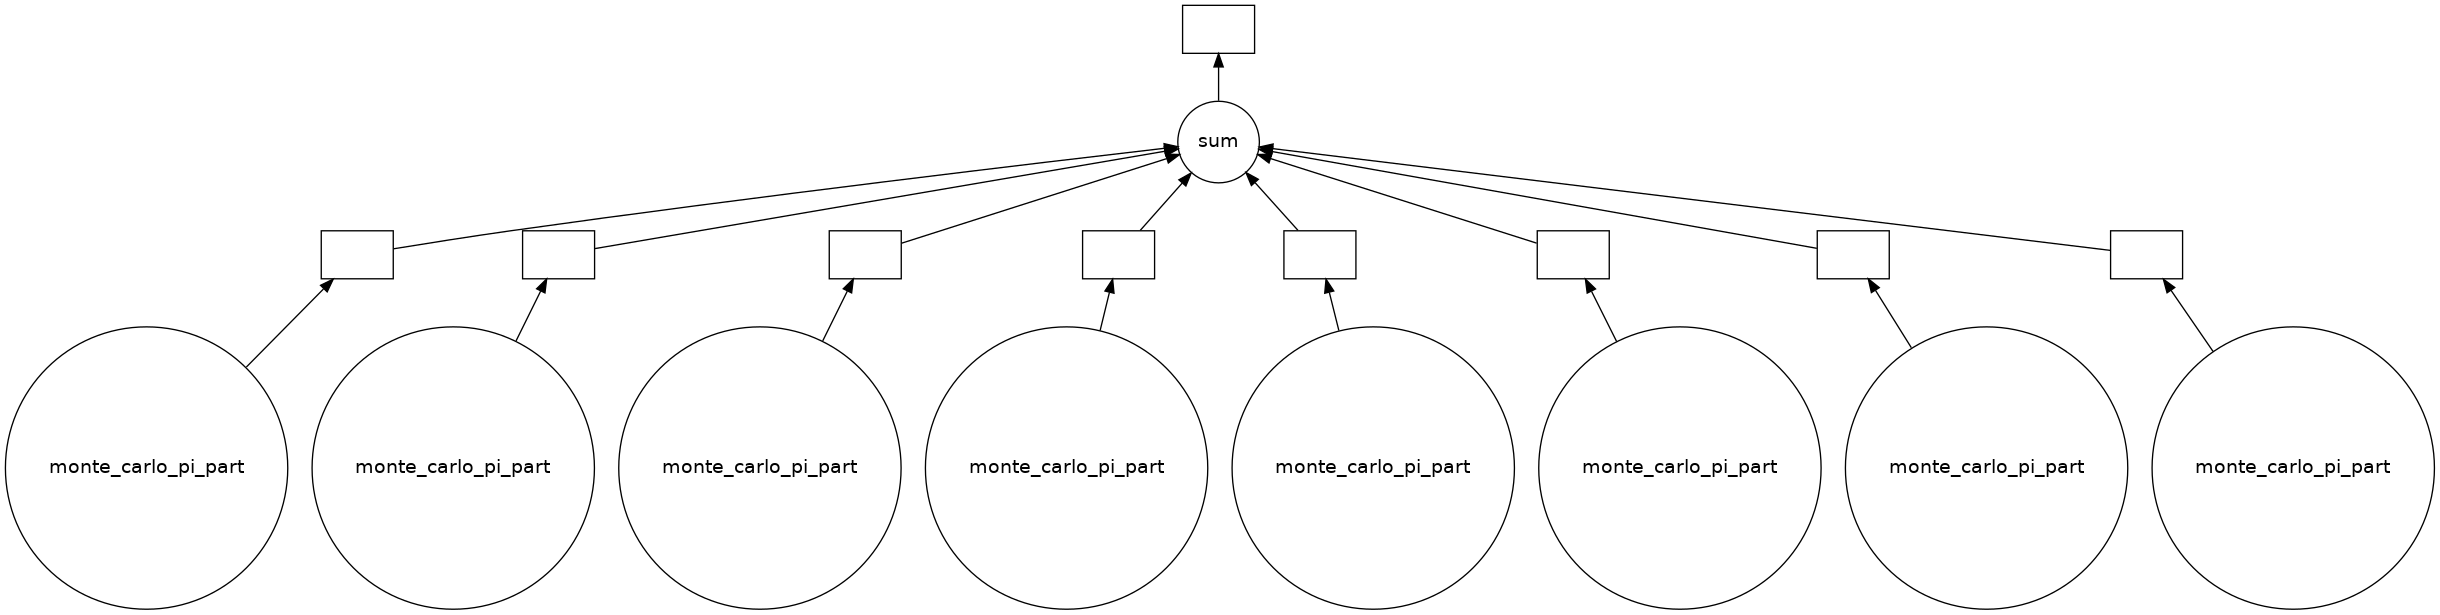

In [43]:
from dask import delayed

count = delayed(sum)([
    delayed(monte_carlo_pi_part)(n // ncpus) for _ in range(ncpus)
])
dask.visualize(count)

We see that Dask built a graph of operations, for each CPU unit, call the monte carlo function and gather the results for the sum value.

In [44]:
estimate = count.compute() * 4 / n
error = np.pi - estimate
print(f"Estimated value of Pi:: {estimate:g}")
print(f"               error :: {error:e}")

Estimated value of Pi:: 3.1417
               error :: -1.032664e-04


Again, the cost differs, and one may approach the problem one way or the other depending on the constraints.

## MPIA, MPCDF, and other places

Being at MPIA, we have access to varied computation facilities.

1. MPIA (in-house): hosted, managed, and funded by MPIA.
    * Only MPIA employees (after requesting account) can use the clusters
2. MPCDF (garching): hosted, managed by MPCDF; funded by MPG (and in part by MPIA)
    * All MPIs employees (after requesting MPCDF account) can use some clusters
    * Access to some machines may be restricted by who funded those.
3. Germany/EU HPC facilities: Hosted and managed by various supercomputing centers
    * Anyone can apply through computation proposals -- Competitive access.

> Different machines/configurations are suitable differently for different tasks. At MPIA, we have a diversity of needs and resources.

### MPIA

MPIA has 9 clusters of non-homogeneous platforms, funded by and accessible to individual groups.
This represents a total of ~ 5 400 CPUs.

Two main categories of clusters
* Interactive Data Processing: e.g., ASTRO nodes -- basically a pool of "desktop" computers.
* Batch/non-interactive Computing Jobs: e.g. BACHELOR_NEW -- submit jobs through a scheduler.

Status of the clusters: [ganglia](http://ganglia.it.mpia.de/ganglia/) (internal/vpn accessible)

**Pros/Cons for the users**
* [+] directly accessible, no (or virtually-no) queues and waiting times
* [+] very low utilization: ~30% over the year
* [-] individually accessible only to selected group members
* [-] non-homogeneous platforms = harder to optimize codes

> Things will start to change at MPIA. Systems will slowly merge into a gigantic (single) cluster. This will help both the users and the IT maintenance load.

### MPCDF (The Max Planck Computing and Data Facility)

The [MPCDF](mpcdf.mpg.de) (formerly RZG) is a cross-institutional center of MPG to support computational and data sciences.

Any MPG employee can get an account (via online forms and approval from members of computing committee). 

[List of clusters](https://www.mpcdf.mpg.de/services/supercomputing#:~:text=user%20documentation.-,High%2DPerformance%20Computing,-The%20MPCDF%20hosts)


#### Supercomputers

* RAVEN (2021)
    * 1592 nodes
    * 114,624 Intel Xeon IceLake-SP  CPU-cores, 375 TB RAM (DDR4), 
    * 768 Nvidia A100 GPUs (192 nodes),  30 TB GPU RAM (HBM2)

* COBRA (2018)
    * 3424 nodes
    * 136,960 Intel Xeon Skylake-SP  CPU-cores, 529 TB CPU RAM (DDR4), 
    * 128 Tesla V100-32 GPUs, 240 Quadro RTX 5000 GPUs, 7.9 TB GPU RAM HBM2 

* Some facts about Raven & Cobra
    * Hardware renewed every ~5-6 years
    * Idle ~5% on average per year (MPIA > 70%)
    * About 150M Core-hours per month
        * across all 25 MPIs as main users
        * MPIA's share ~4 to 8% per month

#### MPIA dedicated cluster
 
* [VERA](https://docs.mpcdf.mpg.de/doc/computing/clusters/systems/Astronomy.html) (2022)
    * login nodes vera[01-02] (500 GB RAM each)
    * 72 execution nodes vera[001-072] (250 GB RAM each)
    * 36 execution nodes vera[101-136] (500 GB RAM each)
    * 2 execution nodes vera[201-202] (2 TB RAM each)
    * 3 execution nodes verag[001-003] (500 GB RAM and 4 Nvidia A100-40GB GPUs each)
    * node interconnect is based on Mellanox/Nvidia Infiniband HDR-100 technology (Speed: 100 Gb/s)
    * Largest possible single batch job: 1680 parallel tasks (48hrs max)
    * 400 TB filesystem (for the GC and PSF, separately, with quotas)

* Some facts:
    * Hardware renewed every ~5-6 years
    * Idle ~10-15% on average per year (MPIA > 70%)
    * About 2.3M Core-hours per month
    * 15-20 main users (average per month)

### What about cloud Computing?

Cloud computing is the on-demand availability of computer system resources. Large clouds often have functions distributed over multiple locations, each location being a data center.

The *cloud* is a generic term commonly used to refer to remote computing resources of any kind -- that is, any computers that you use but are not right in front of you. Cloud can refer to machines serving websites, providing shared storage, providing webservices (such as e-mail or social media platforms), as well as more traditional "compute" resources.

Cloud computing is like a virtual cluster, capable of instanciating nodes on-demand to provide services and run tasks.

> Turns-out, MPCDF has a [cloud computing service](https://docs.mpcdf.mpg.de/doc/computing/cloud/index.html) that we are exploring as beta testers at the moment.

## Working on a remote HPC system

### What is an HPC system?

An *HPC system* is a term used to describe a network of computers dedicated to "high performance computing". The computers in a cluster typically share a common purpose, and are used to accomplish tasks that might otherwise be too big for any one computer.


### MPCDF Logging in

The gateway machines `gatezero.mpcdf.mpg.de` and `gateafs.mpcdf.mpg.de` provide ssh access to MPCDF computing resources. One should note that gatezero has no access to AFS, but the home directory `$HOME` is local to that machine and very limited in size. Note that all MPCDF gateway machines enforce 2 factor authentication (2FA).

See details on the [gateways online documentation](https://docs.mpcdf.mpg.de/doc/computing/gateways.html).

Go ahead and log in to the MPCDF gateway:
```bash
> ssh -XY <your_username>@gate.mpcdf.mpg.de

```
This should prompt you for your 2FA code as well.

The options `-XY` ensure that any Unix graphical output (e.g. if you run a GUI, look at an image or plot a graph) are sent
back to your own laptop. You may need to specify these options explicitly.

From there you need to reach final destination, the cluster of your choice: e.g. raven:

```bash
> ssh raven
[...]
fmorg@raven01:~>
```

### Tip: sshconfig

You can set your computer to directly connect you to the machines by add some lines to your `~/.ssh/config` file.

Example:
```
Host raven
        User <your_username>
        Hostname raven.mpcdf.mpg.de
        ProxyCommand ssh -W %h:%p fmorg@gate.mpcdf.mpg.de 

Host cobra
        User <your_username>
        Hostname cobra.mpcdf.mpg.de
        ProxyCommand ssh -W %h:%p fmorg@gate.mpcdf.mpg.de 

Host vera01
        User <your_username>
        Hostname vera01.bc.rzg.mpg.de
        ProxyCommand ssh -W %h:%p fmorg@gate.mpcdf.mpg.de 
```

+ sshkeys
+ ssh remember passwords time.

Let's have a look at the [computing documentation](https://docs.mpcdf.mpg.de/doc/computing/) 

### Cheatsheet

HPC clusters at MPCDF use Slurm job scheduler for batch job management and execution.

[MPCDF scheduler cheatsheet](https://docs.mpcdf.mpg.de/doc/computing/clusters/aux/migration-from-sge-to-slurm)

### Software environment (modules)

The MPCDF uses [module system](https://docs.mpcdf.mpg.de/doc/computing/software/environment-modules.html) to adapt the user environment for working with software installed at various locations in the file system or for switching between different software versions. Users need to explicitly specify the full version for compiler and MPI modules during compilation and in batch scripts to ensure compatibility of the MPI library.

Due to the hierarchical module environment, many libraries and applications only appear after loading a compiler, and subsequently also a MPI module (the order is important here: first, load compiler, then load the MPI). These modules provide libraries and software consistently compiled with/for the user-selected combination of compiler and MPI library.

To search the full hierarchy, the `find-module` command can be used. All fftw-mpi modules, e.g., can be found using `find-module fftw-mpi`.

* `module avail` to list the available software packages on the HPC system. Note that you can search for a certain module by using the find-module tool (see below).
* `module load package_name/version` to actually load a software package at a specific version.

Information on the software packages provided by the MPCDF is available [here](https://docs.mpcdf.mpg.de/doc/computing/software/index.html).

> The module library is also on the MPIA clusters (but the list of libraries differs from MPCDF)

### SLURM: Scheduler / batch system

The batch system on the MPCDF & MPIA clusters is the open-source workload manager Slurm (Simple Linux Utility for Resource management). To run test or production jobs, submit a job script (see below) to Slurm, which will find and allocate the resources required for your job (e.g. the compute nodes to run your job on).

By default, their is a limited number of jobs you can run at once. For instance, it is set to 8 on Raven, the default job submit limit is 300. If your batch jobs can’t run independently from each other, you need to use job steps.

There are mainly two types of batch jobs:

* **Exclusive**, where all resources on the nodes are allocated to the job

* **Shared**, where several jobs share the resources of one node. In this case it is necessary that the number of CPUs and the amount of memory are specified for each job.

[MPCDF introduction](https://docs.mpcdf.mpg.de/doc/computing/raven-user-guide.html#slurm-batch-system)

### Important key points

* **Job script structure**: scripts are relatively always the same: written in bash with a sweep of `#SBATCH` option declarations, then loading necessary modules and libraries, and finally what the job commands are.

* **Bash shebang option -l** (`#!/bin/bash -l`): The `-l` option makes "bash act as if it had been invoked as a login shell". Login shells read certain initialization files from your home directory, such as . bash_profile . Since you set the value of TEST in your .

* **Wall clock limit** (`--time`): Always set how long your code will run instead of using the largest value. This not only makes sure you have an idea, but also can be used to get your job up the queue!

* **srun for parallel processing**: as soon as your code will use multiple cores, run the code with `srun` so the system uses optimally the resources.

### Examples

* MPI batch job without hyperthreading

```bash
#!/bin/bash -l
# Standard output and error:
#SBATCH -o ./job.out.%j
#SBATCH -e ./job.err.%j
# Initial working directory:
#SBATCH -D ./
# Job Name:
#SBATCH -J test_slurm
#
# Number of nodes and MPI tasks per node:
#SBATCH --nodes=16
#SBATCH --ntasks-per-node=72
#
#SBATCH --mail-type=none
#SBATCH --mail-user=userid@example.mpg.de
#
# Wall clock limit (max. is 24 hours):
#SBATCH --time=12:00:00

# Load compiler and MPI modules (must be the same as used for compiling the code)
module purge
module load intel/21.2.0 impi/2021.2

# Run the program:
srun ./myprog > prog.out
```

* Using SLURM variables to set openMP

```bash
#!/bin/bash -l
# Standard output and error:
#SBATCH -o ./job_hybrid.out.%j
#SBATCH -e ./job_hybrid.err.%j
# Initial working directory:
#SBATCH -D ./
# Job Name:
#SBATCH -J test_slurm
#
# Number of nodes and MPI tasks per node:
#SBATCH --nodes=16
#SBATCH --ntasks-per-node=4
# for OpenMP:
#SBATCH --cpus-per-task=18
#
#SBATCH --mail-type=none
#SBATCH --mail-user=userid@example.mpg.de
#
# Wall clock limit (max. is 24 hours):
#SBATCH --time=12:00:00

# Load compiler and MPI modules (must be the same as used for compiling the code)
module purge
module load intel/21.2.0 impi/2021.2

export OMP_NUM_THREADS=$SLURM_CPUS_PER_TASK

# For pinning threads correctly:
export OMP_PLACES=cores

# Run the program:
srun ./myprog > prog.out
```

* an example from my work

```
#!/bin/bash -l
#
# This script submit to a SLURM queue
#
# Example Usage:
#
# 	> sbatch --array=1-10:1 slurm.script.array
#
# This should submit (in principle) <CMD> 1 then <CMD> 2 ...
#
#------------------- SLURM --------------------
#
#SBATCH --job-name=bob_template
#SBATCH --chdir=./
#SBATCH --export=ALL
# output: {jobname}_{jobid}_{arraytask}.stdout
#SBATCH --output=logs/%x_%A_%a.stdout
#SBATCH --partition=p.48h.share
#SBATCH -t 48:0:0
#SBATCH --get-user-env
#SBATCH --exclusive=user
#SBATCH --mem=1G
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --mail-user do-not-exist-user@mpia.de
#SBATCH --mail-type=ALL
#
# -------------- Configuration ---------------

module purge
module load anaconda/3_2019.10
module load git gcc/7.2 hdf5-serial/gcc/1.8.18 mkl/2019

export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$MKL_HOME/lib/intel64/:${HDF5_HOME}/lib

# Set the number of cores available per processif the $SLURM_CPUS_PER_TASK is
# set
if [ ! -z $SLURM_CPUS_PER_TASK ] ; then
	export OMP_NUM_THREADS=$SLURM_CPUS_PER_TASK
else
	export OMP_NUM_THREADS=1
fi

# -------------- Commands ---------------

# Checking python distribution
function python_info(){
        printf "\033[1;32m * Python Distribution:\033[0m "
	python -c "import sys; print('Python %s' % sys.version.split('\n')[0])"
	}
# python_info

# get the configuration slice
n_cpus=${SLURM_CPUS_PER_TASK}
n_per_process=1000
slice_index=$((${SLURM_ARRAY_TASK_ID} -1))
processing_start=$((${slice_index} * ${n_per_process}))
processing_end=$((${slice_index} * ${n_per_process} + ${n_per_process}))

CMD="./main_mars"
RUN="testsample"
# RUN="orionsample"
MOD="emulators/oldgrid_with_r0_w_adjacent.emulator.hdf5"
INF="data/testsample.vaex.hdf5"
# INF="data/orionsample.vaex.hdf5"
OUT="./results/${RUN}"
min=$((processing_start))
max=$((processing_end + 1))
NBURN=4000
NKEEP=500
NWALKERS=40
SAMPLES="samples/${RUN}"

CMDLINE="${CMD} -r ${RUN} -m ${MOD} -i ${INF} -o ${OUT} --from ${min} --to ${max} --nburn ${NBURN} --nkeep ${NKEEP} --nwalkers ${NWALKERS}"
echo ${CMDLINE}
${CMDLINE}
```

> Codes will often run longer than the queues allow them. For instance, an N-Body simulation like TNG or Aquarius, runs over millions of CPU hours for many months. It is critical that you have checkpoints in your codes, i.e. ways to resume from a mid-point, not restart from scratch. (see workflow design)

# Workflow design

A workflow defines the phases (or steps) in a science project. Using a well-defined workflow is useful in that it provides a simple way to remind all team members (which includes a scheduler for instance) of the work to be done.

One way to think about the benefit of having a well-defined data workflow is that itsets guardrails to help you plan, organize, and implement your runs.

You have been using workflows before:
```
echo "number of physical cpus"  $(cat /proc/cpuinfo | grep "physical id" | uniq | wc -l)
echo "number of logical cores"  $(cat /proc/cpuinfo | grep "processor" | uniq | wc -l)
```

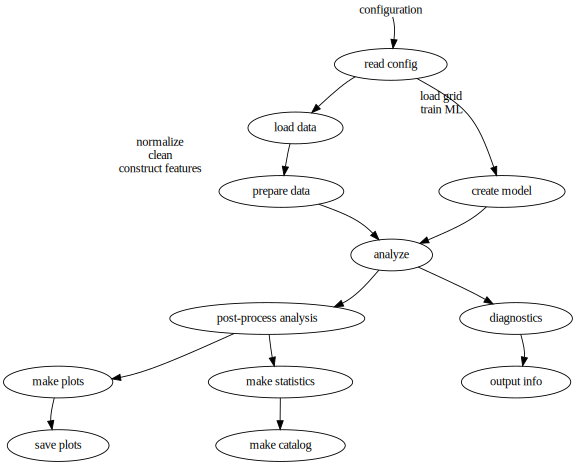

In [47]:
render_dot("""
digraph {
	rankdir=UD;
    splines=curved;
    nodesep=1.5;
    
    configuration [shape=plain]
    "read config"
    configuration ->  "read config"
    "read config" -> "load data" -> "prepare data"
    "prepare data" [xlabel="normalize\nclean\nconstruct features"]
    "read config" -> "create model" [xlabel="load grid\ntrain ML"]
    
    "create model" -> analyze
    "prepare data" -> analyze
    
    pproc [label="post-process analysis"]
    analyze -> pproc
    analyze -> diagnostics

    diagnostics -> "output info"
    pproc -> "make plots" -> "save plots"
    pproc -> "make statistics" -> "make catalog"
}""")

You could rapidly see which parts could be parallelized. In addition, one could imagine analyzing a lot of independent chunks of data.

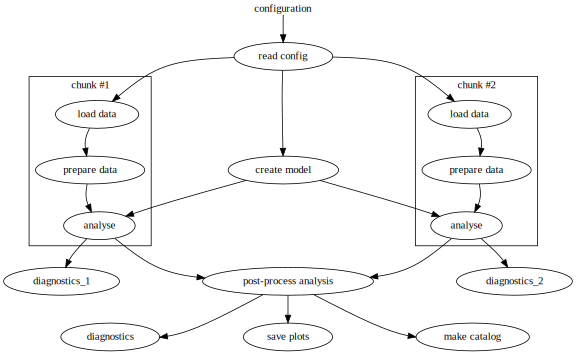

In [48]:
render_dot("""
digraph {
    rankdir=UD;
    splines=curved;
    nodesep=1.5;
    
    configuration [shape=plain]
    "read config"
    configuration ->  "read config"
    "read config" -> "create model"
    "create model" -> analyze_1
    "create model" -> analyze_2
    "read config" -> loaddata_1 
    "read config" -> loaddata_2
    
    subgraph cluster_1 {
        label = "chunk #1";
        loaddata_1 [label="load data"]
        prepdata_1 [label="prepare data"]
        analyze_1 [label="analyse"]
        loaddata_1 -> prepdata_1
        prepdata_1 -> analyze_1
    }
    
    subgraph cluster_2 {
        label = "chunk #2";
        loaddata_2 [label="load data"]
        prepdata_2 [label="prepare data"]
        analyze_2 [label="analyse"]
        loaddata_2 -> prepdata_2
        prepdata_2 -> analyze_2
    }
    
    pproc [label="post-process analysis"]
    analyze_1 -> pproc -> diagnostics
    analyze_1 -> diagnostics_1
    analyze_2 -> pproc
    analyze_2 -> diagnostics_2


    pproc -> "save plots"
    pproc -> "make catalog"
    
}
""")

But you do not want to restart any of this from scratch.

What about having a flow that would be something like
```
download data -> checkpoint -> Analyze chunk = {C1 -> checkpoint, C2 -> checkpoint} -> post processing
```
where your code would know automatically that if the result of C1 did not change, there is not need to redo.

> Have you noticed the resemblance with Dask's graph?

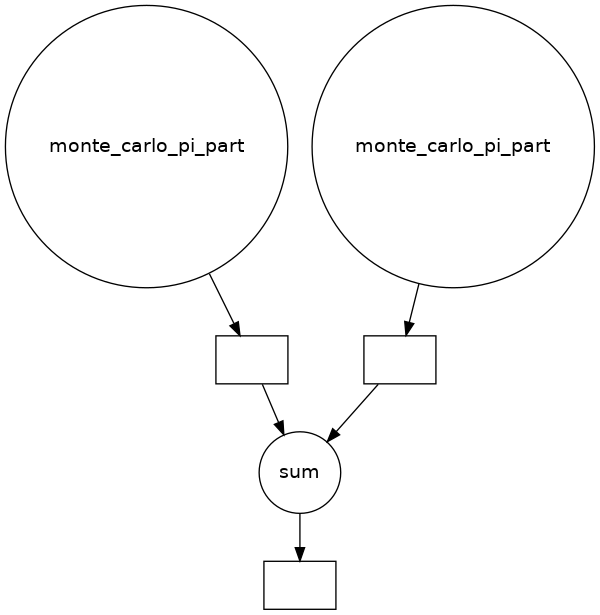

In [51]:
# Example from above (with ncpus=2 to make a small graph)
from dask import delayed

count = delayed(sum)([
    delayed(monte_carlo_pi_part)(n // ncpus) for _ in range(2)
])
dask.visualize(count, optimize_graph=True, rankdir='UD')

## Make

[Gnu Make](https://www.gnu.org/software/make/) is a / "the" tool of reference which controls the generation of executables and other non-source files of a program from the program's source files.

Make gets its knowledge of how to build your program from a file called the makefile, which lists each of the non-source files and how to compute it from other files. When you write a program, you should write a makefile for it, so that it is possible to use Make to build and install the program. 

Of course, even if initially meant to construct executables, we (users) have (trivially) extended the use-cases to generating anything.


## Snakemake ("*the pythonic make*")

[Snakemake](https://snakemake.readthedocs.io/en/stable/) is workflow management system, i.e. it is a tool to create reproducible and scalable data analyses. Workflows are described via a human readable, Python based language. They can be seamlessly scaled to server, cluster, grid and cloud environments, without the need to modify the workflow definition. Finally, Snakemake workflows can entail a description of required software, which will be automatically deployed to any execution environment.



In [52]:
# Cleaning previous runs
!rm -rf report testdir testdir1  report.html *.done

In [53]:
%%file snakefile
 
samples = [1, 2, 3, 4, 5]


rule all:
        input: "final.done", "rule11.done", "rule10.done"

rule a:
    output:
        "testdir/{sample}.out"
    group: "grp_a"
    shell:
        "touch {output}"

rule b:
    input:
        "testdir/{sample}.out"
    output:
        "testdir1/{sample}.out"
    group: "grp_a"
    shell:
        "touch {output}"

rule c:
    input:
        expand("testdir1/{sample}.out", sample=samples)
    output:
        "final.done"
    shell:
        "touch {output}"

rule rule10:
        output: 
                "rule10.done"
        shell: 
                "ls -la {input} > rule10.done"

rule rule2:
        input: "rule10.done", "rule11.done", "testdir"
        output: "rule2.done"
        shell: "touch rule2.done"

rule rule21:
        input: "rule10.done", "rule11.done"
        output: "rule21.done"
        shell: "touch rule21.done"

rule rule11:
        output: "rule11.done"
        shell: "touch rule11.done"

Overwriting snakefile


Building DAG of jobs...


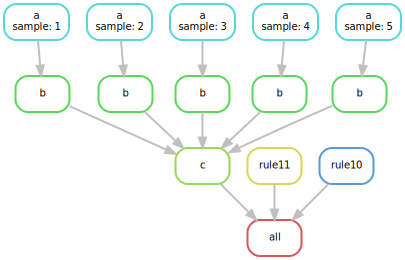

In [54]:
from IPython.display import SVG
import subprocess

proc = subprocess.Popen(['snakemake',  '--dag'], stdout=subprocess.PIPE)
output = subprocess.check_output(('dot', '-Tsvg'), stdin=proc.stdout)
proc.wait()
SVG(data=output.decode())

In [55]:
!snakemake -c1

Building DAG of jobs...
Using shell: /bin/bash
Provided cores: 1 (use --cores to define parallelism)
Rules claiming more threads will be scaled down.
Job stats:
job       count    min threads    max threads
------  -------  -------------  -------------
a             5              1              1
all           1              1              1
b             5              1              1
c             1              1              1
rule10        1              1              1
rule11        1              1              1
total        14              1              1

Select jobs to execute...

[Mon Sep 26 17:03:48 2022]
rule a:
    output: testdir/1.out
    jobid: 3
    reason: Missing output files: testdir/1.out
    wildcards: sample=1
    resources: tmpdir=/tmp

[Mon Sep 26 17:03:48 2022]
Finished job 3.
1 of 14 steps (7%) done
Select jobs to execute...

[Mon Sep 26 17:03:48 2022]
rule rule11:
    output: rule11.done
    jobid: 12
    reason: Missing output files: rule11.done
    r

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32bb59d1-0a84-42b2-900e-9ea02071b8e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>